In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier 
from catboost import CatBoostClassifier    
from lightgbm import LGBMClassifier
import h2o
from h2o.automl import H2OAutoML


In [120]:
df= pd.read_csv('heart.csv')
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [122]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# UNI-Variate Analysis

### Age Column

In [123]:
df['Age'].describe()


count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

Text(0, 0.5, 'Count')

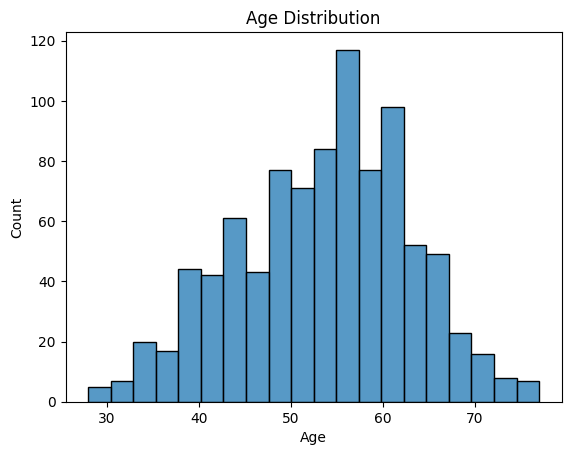

In [124]:
sns.histplot(df['Age'], bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

- **Most ages are between 50 and 62**

### Sex Column

In [125]:
count=df['Sex'].value_counts()
percent=df['Sex'].value_counts(normalize=True)*100
freq_table=pd.DataFrame({"Frequency": count, "Percentage": percent})
freq_table

,Frequency,Percentage
Sex,,
M,725,78.976035
F,193,21.023965


Text(0.5, 0, 'Sex')

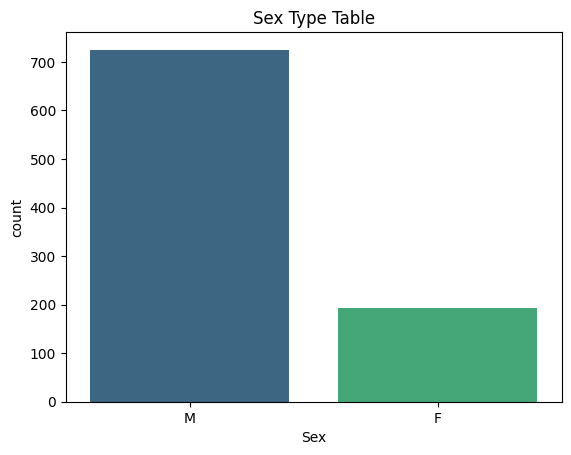

In [126]:
sns.barplot(x=['M','F'],y=count,palette='viridis')
plt.title("Sex Type Table")
plt.xlabel("Sex")


- **Males suffer more Heart diseases than females**

### Chest Pain Type

In [127]:
count=df['ChestPainType'].value_counts()
percent=df['ChestPainType'].value_counts(normalize=True)*100
freq_table=pd.DataFrame({"Frequency": count,"Percentage": percent})
print(freq_table)

               Frequency  Percentage
ChestPainType                       
ASY                  496   54.030501
NAP                  203   22.113290
ATA                  173   18.845316
TA                    46    5.010893


Text(0.5, 0, 'Chest Pain Type')

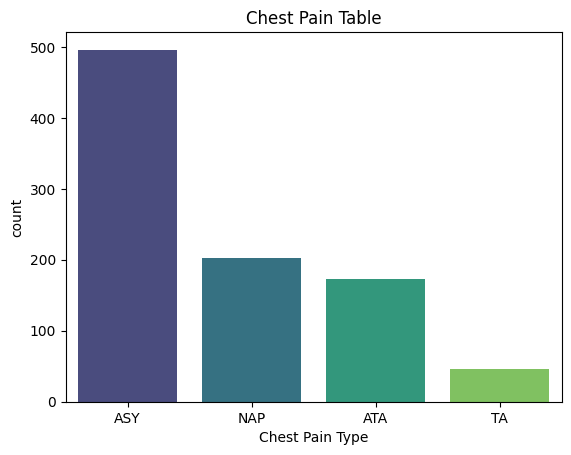

In [128]:
sns.barplot(x=['ASY','NAP','ATA','TA'],y=count,palette='viridis')
plt.title("Chest Pain Table")
plt.xlabel('Chest Pain Type')

- **ASY is the most common chest pain type** 

### RestingBP column

In [129]:
df['RestingBP'].describe()

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

Text(0, 0.5, 'Count')

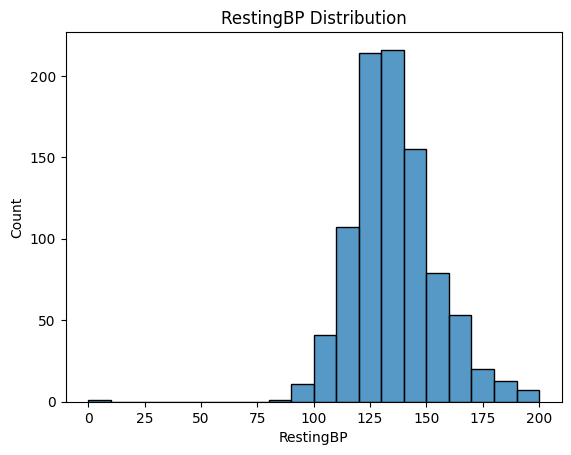

In [130]:
sns.histplot(df['RestingBP'], bins=20)
plt.title("RestingBP Distribution")
plt.xlabel("RestingBP")
plt.ylabel("Count")

In [131]:
Q1 = df['RestingBP'].quantile(0.25)
Q3 = df['RestingBP'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

90.0
170.0


In [132]:
outliers = df[(df['RestingBP'] < lower_bound) | (df['RestingBP'] > upper_bound)]
outliers

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
123,58,F,ATA,180,393,0,Normal,110,Y,1.0,Flat,1
189,53,M,ASY,180,285,0,ST,120,Y,1.5,Flat,1
190,46,M,ASY,180,280,0,ST,120,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
274,45,F,ATA,180,295,0,Normal,180,N,0.0,Up,0
275,59,M,NAP,180,213,0,Normal,100,N,0.0,Up,0
278,57,F,ASY,180,347,0,ST,126,Y,0.8,Flat,0
314,53,M,ASY,80,0,0,Normal,141,Y,2.0,Down,0
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1


- **The average is from 120-200**


# Cholesterol Column

In [133]:
df['Cholesterol'].describe()

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

Text(0, 0.5, 'Count')

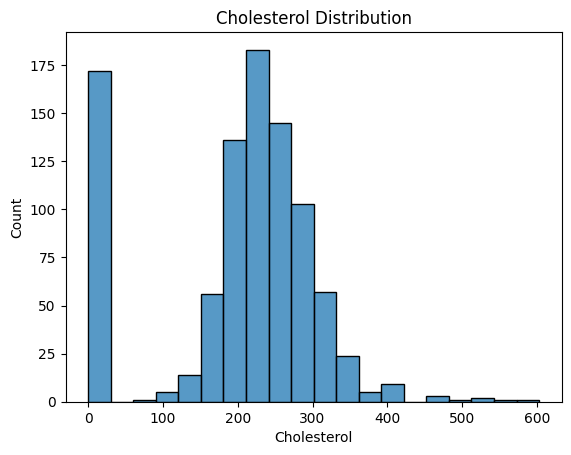

In [134]:
sns.histplot(df['Cholesterol'], bins=20)
plt.title("Cholesterol Distribution")
plt.xlabel("Cholesterol")
plt.ylabel("Count")

In [135]:
Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

32.625
407.625


In [136]:
outliers = df[(df['Cholesterol'] < lower_bound) | (df['Cholesterol'] > upper_bound)]
outliers

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
69,44,M,ASY,150,412,0,Normal,170,N,0.0,Up,0
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
103,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1
536,62,M,NAP,133,0,1,ST,119,Y,1.2,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0
667,65,F,NAP,140,417,1,LVH,157,N,0.8,Up,0


- **Less than 200 is Good**

- **From 200-239 is Moderate**

- **High is from 240 or higher**

### FastingBS column

In [137]:
count=df['FastingBS'].value_counts()
percent=df['FastingBS'].value_counts(normalize=True)*100
freq_table=pd.DataFrame({"Frequency": count,"Percentage":percent})
print(freq_table)

           Frequency  Percentage
FastingBS                       
0                704   76.688453
1                214   23.311547


Text(0.5, 0, 'FastingBS')

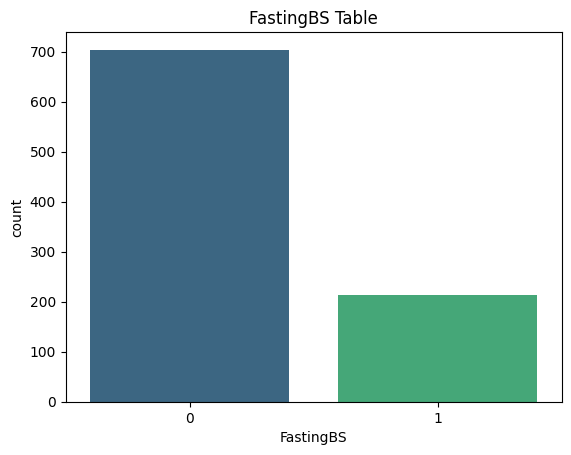

In [138]:
sns.barplot(x=['0','1'],y=count,palette='viridis')
plt.title('FastingBS Table')
plt.xlabel('FastingBS')


- **Most people don't have FastingBS**

### RestingECG column

In [139]:
count=df['RestingECG'].value_counts()
percent=df['RestingECG'].value_counts(normalize=True)*100
print(count)
freq_table=pd.DataFrame({"Frequency": count,"Percentage":percent})
print(freq_table)

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
            Frequency  Percentage
RestingECG                       
Normal            552   60.130719
LVH               188   20.479303
ST                178   19.389978


Text(0.5, 0, 'RestingECG')

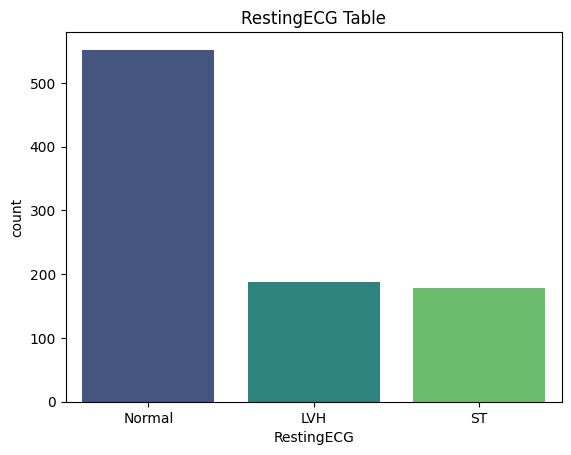

In [140]:
sns.barplot(x=['Normal','LVH','ST'],y=count,palette='viridis')
plt.title('RestingECG Table')
plt.xlabel('RestingECG')

- **Most people are Normal**

### MaxHR column

In [141]:
df['MaxHR'].describe()


count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

Text(0, 0.5, 'Count')

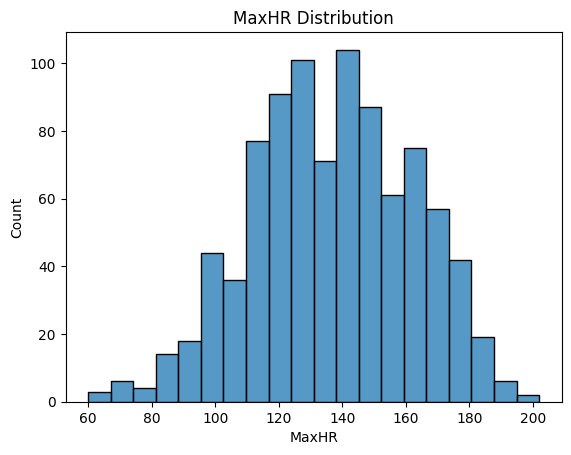

In [142]:
sns.histplot(df['MaxHR'], bins=20)
plt.title("MaxHR Distribution")
plt.xlabel("MaxHR")
plt.ylabel("Count")

In [143]:
Q1 = df['MaxHR'].quantile(0.25)
Q3 = df['MaxHR'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

66.0
210.0


In [144]:
outliers = df[(df['MaxHR'] < lower_bound) | (df['MaxHR'] > upper_bound)]
outliers

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
370,60,M,ASY,135,0,0,Normal,63,Y,0.5,Up,1
390,51,M,ASY,140,0,0,Normal,60,N,0.0,Flat,1


- **Subtract your age from 220**

### ExerciseAngina column

In [145]:
count=df['ExerciseAngina'].value_counts()
percent=df['ExerciseAngina'].value_counts(normalize=True)*100
freq_table=pd.DataFrame({"Frequency": count,'Percentage':percent})
print(freq_table)

                Frequency  Percentage
ExerciseAngina                       
N                     547   59.586057
Y                     371   40.413943


Text(0.5, 0, 'Exercise Angina')

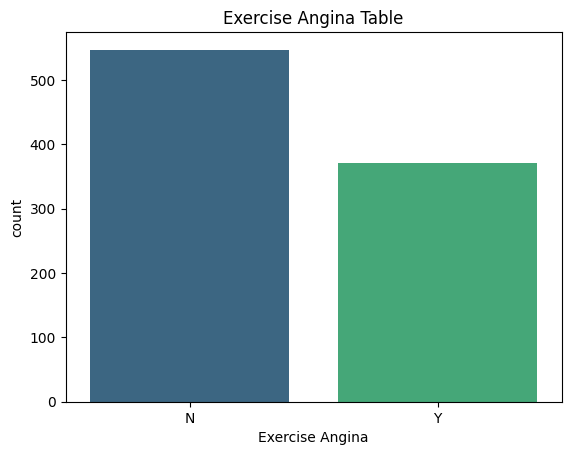

In [146]:
sns.barplot(x=['N','Y'],y=count,palette='viridis')
plt.title('Exercise Angina Table')
plt.xlabel('Exercise Angina')

- **People have no ExerciseAngina more than people that have ExerciseAngina**

### Oldpeak Column

In [147]:
df['Oldpeak'].describe()

count    918.000000
mean       0.887364
std        1.066570
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

Text(0, 0.5, 'Count')

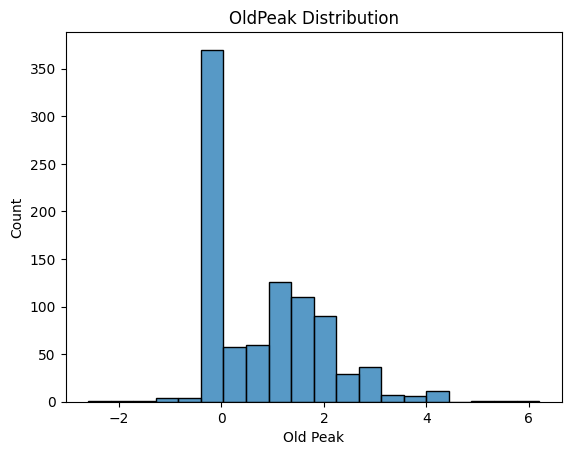

In [148]:
sns.histplot(df['Oldpeak'], bins=20)
plt.title("OldPeak Distribution")
plt.xlabel("Old Peak")
plt.ylabel("Count")

- **Most People Have below zero oldpeak**

### ST_Slope column

In [149]:
count=df['ST_Slope'].value_counts()
percent=df['ST_Slope'].value_counts(normalize=True)*100
freq_table=pd.DataFrame({"Frequency": count,"Percentage":percent})
print(freq_table)

          Frequency  Percentage
ST_Slope                       
Flat            460   50.108932
Up              395   43.028322
Down             63    6.862745


Text(0.5, 0, 'Exercise Angina')

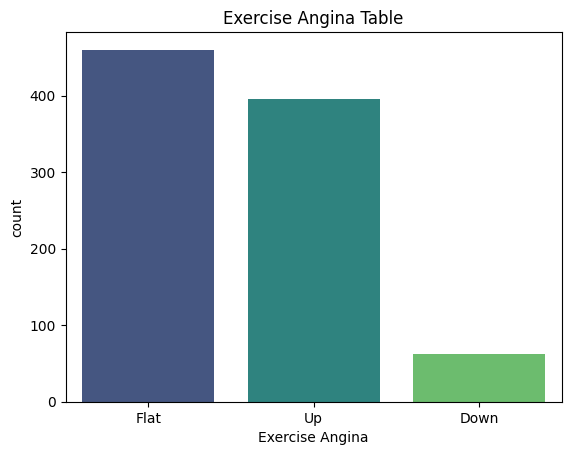

In [150]:
sns.barplot(x=['Flat','Up','Down'],y=count,palette='viridis')
plt.title('Exercise Angina Table')
plt.xlabel('Exercise Angina')

- **Most people Have Flat St-slope**

In [151]:
df.corr(numeric_only=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


### Heart Disease Column

In [152]:
count=df['HeartDisease'].value_counts()
percent=df['HeartDisease'].value_counts(normalize=True)*100
freq_table=pd.DataFrame({"Frequency": count, "Percentage": percent})
print(freq_table)

              Frequency  Percentage
HeartDisease                       
1                   508   55.337691
0                   410   44.662309


Text(0.5, 0, 'Heart Disease')

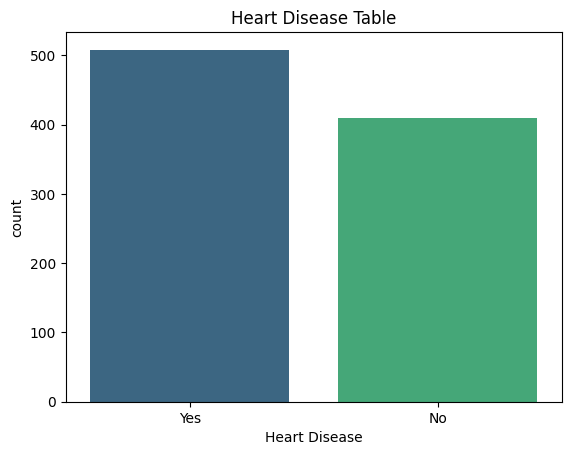

In [153]:
sns.barplot(x=['Yes','No'],y=count,palette='viridis')
plt.title('Heart Disease Table')
plt.xlabel('Heart Disease')

- **More people have heart disease**

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [155]:
df.groupby(['Sex'])['HeartDisease'].value_counts()

Sex  HeartDisease
F    0               143
     1                50
M    1               458
     0               267
Name: count, dtype: int64

- **Percentage of males getting a heart disease is higher than a female getting a Heart Disease**

In [156]:
df.groupby('RestingBP')['ChestPainType'].value_counts()

RestingBP  ChestPainType
0          NAP              1
80         ASY              1
92         ASY              1
94         NAP              2
95         ASY              5
                           ..
190        ATA              1
           ASY              1
192        ATA              1
200        ASY              3
           NAP              1
Name: count, Length: 158, dtype: int64

In [157]:
df.groupby('ChestPainType')['HeartDisease'].value_counts()  # or any other aggregate function


ChestPainType  HeartDisease
ASY            1               392
               0               104
ATA            0               149
               1                24
NAP            0               131
               1                72
TA             0                26
               1                20
Name: count, dtype: int64

- **The number of people that have ASY chest pain are the most people that have heart disease**

In [158]:
bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
df['AgeRange'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [159]:
df.groupby('AgeRange')['HeartDisease'].value_counts()

AgeRange  HeartDisease
<30       0                 4
          1                 0
30-39     0                50
          1                26
40-49     0               126
          1                85
50-59     1               212
          0               162
60-69     1               163
          0                59
70-79     1                22
          0                 9
80-89     0                 0
          1                 0
90+       0                 0
          1                 0
Name: count, dtype: int64

- **The Most ages that people got heart disease is from ages 40 to 69**

In [160]:
df.groupby(['AgeRange','Sex'])['HeartDisease'].mean()

AgeRange  Sex
<30       F           NaN
          M      0.000000
30-39     F      0.157895
          M      0.403509
40-49     F      0.115385
          M      0.496855
50-59     F      0.277778
          M      0.635762
60-69     F      0.454545
          M      0.803371
70-79     F      0.166667
          M      0.840000
80-89     F           NaN
          M           NaN
90+       F           NaN
          M           NaN
Name: HeartDisease, dtype: float64

- **The probablity of a Male to get heart disease keeps increasing till he is 80**


- **The probability of a Female getting a heart disease is always in average but increased during age 60-69**

## Machine Learning

In [161]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,23 mins 08 secs
H2O_cluster_timezone:,Africa/Cairo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_George_Hany_0900iq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.592 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [162]:
data = h2o.import_file("heart.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [163]:
data['HeartDisease'] = (data['HeartDisease'] == 1).ifelse('Yes', 'No')
data

Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
40,M,ATA,140,289,0,Normal,172,N,0,Up,No
49,F,NAP,160,180,0,Normal,156,N,1,Flat,Yes
37,M,ATA,130,283,0,ST,98,N,0,Up,No
48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,Yes
54,M,NAP,150,195,0,Normal,122,N,0,Up,No
39,M,NAP,120,339,0,Normal,170,N,0,Up,No
45,F,ATA,130,237,0,Normal,170,N,0,Up,No
54,M,ATA,110,208,0,Normal,142,N,0,Up,No
37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,Yes
48,F,ATA,120,284,0,Normal,120,N,0,Up,No


In [166]:
x = data.drop('HeartDisease')  # Dropping the target column from the predictors
y = 'HeartDisease'             # Setting the target as a string, not an H2OFrame

aml = H2OAutoML(max_models=10, seed=1)

# Train the model
aml.train(x=x.columns, y=y, training_frame=data)  # x.columns to get the list of column names


AutoML progress: |█
20:22:45.265: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),8/10
# GBM base models (used / total),5/6
# DRF base models (used / total),1/2
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [169]:
leader_b = aml.leaderboard
print(leader_b)

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse
StackedEnsemble_AllModels_1_AutoML_2_20240913_202245     0.936343   0.315038  0.937687                0.120415  0.306891  0.0941819
GBM_3_AutoML_2_20240913_202245                           0.936033   0.316322  0.93638                 0.118533  0.307466  0.0945352
StackedEnsemble_BestOfFamily_1_AutoML_2_20240913_202245  0.935774   0.316826  0.935061                0.12403   0.307013  0.0942571
GBM_4_AutoML_2_20240913_202245                           0.934867   0.318464  0.934985                0.129422  0.310087  0.0961542
GBM_2_AutoML_2_20240913_202245                           0.934756   0.319106  0.935474                0.1343    0.309992  0.0960951
GBM_5_AutoML_2_20240913_202245                           0.931575   0.327463  0.934424                0.131669  0.314784  0.0990887
GBM_1_AutoML_2_20240913_202245                           0.931328   0.328063

In [172]:
best_model = aml.leader
best_model

key,value
Stacking strategy,cross_validation
Number of base models (used / total),8/10
# GBM base models (used / total),5/6
# DRF base models (used / total),1/2
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [171]:
# New data
new_data = h2o.H2OFrame({'Age': [45], 'Sex': ['M'], 'ChestPainType': ['ATA'], 'RestingBP': [140], 'Cholesterol': [200], 'FastingBS': [0], 'RestingECG': ['Normal'], 'MaxHR': [170], 'ExerciseAngina': ['N'], 'Oldpeak': [0.0], 'ST_Slope': ['Up']})

# Make predictions
predictions = best_model.predict(new_data)
print(predictions)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
predict          No        Yes
No         0.983591  0.0164087
[1 row x 3 columns]

